### Classificação de textos do Twitter com spaCy

### Etapa 1: Importação das bibliotecas

In [8]:
import spacy
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

### Etapa 2: Carregamento das bases de dados

- Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

### Base de treinamento

- Negative label: 0
- Positive label: 1

In [3]:
base_treinamento = pd.read_csv('Train50.csv', delimiter=';')

In [4]:
base_treinamento.shape

(50000, 5)

In [5]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [6]:
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


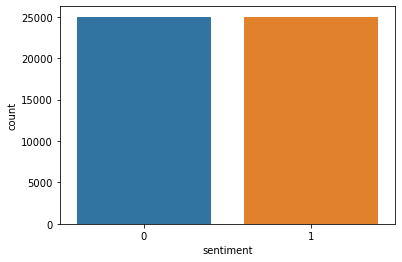

In [9]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem');

In [10]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [11]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


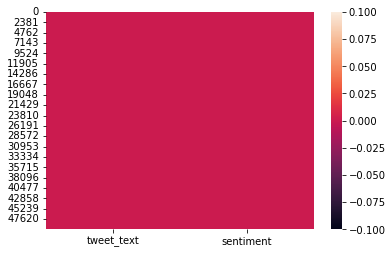

In [12]:
sns.heatmap(pd.isnull(base_treinamento));

### Base de teste

In [13]:
base_teste = pd.read_csv('Test.csv', delimiter=';')

In [14]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [15]:
base_teste.shape

(5000, 5)

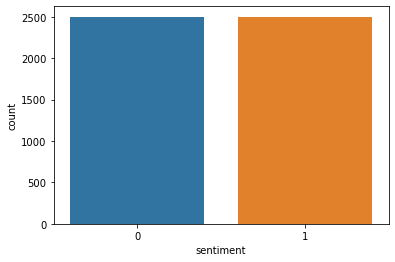

In [16]:
sns.countplot(base_teste['sentiment'], label='Contagem');

In [17]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [18]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


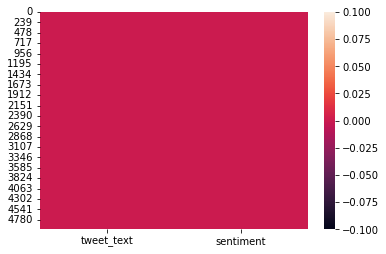

In [19]:
sns.heatmap(pd.isnull(base_teste));

### Etapa 3: Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [21]:
pln = spacy.load('pt_core_news_sm')
pln

In [22]:
base_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [23]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [24]:
print(stop_words)

{'comprido', 'tal', 'vão', 'tivemos', 'estou', 'dezoito', 'porém', 'todas', 'ele', 'relação', 'depois', 'aqui', 'nível', 'nunca', 'tem', 'tipo', 'quatro', 'toda', 'des', 'direita', 'conhecida', 'quinto', 'meus', 'favor', 'mais', 'aquilo', 'certamente', 'fazeis', 'sexto', 'somente', 'sete', 'qual', 'demais', 'porquanto', 'quinze', 'estiveram', 'à', 'ir', 'fez', 'boa', 'caminho', 'estás', 'essa', 'enquanto', 'faz', 'agora', 'estar', 'cima', 'um', 'tais', 'usar', 'todos', 'eventual', 'sétimo', 'até', 'elas', 'mas', 'antes', 'local', 'fazem', 'inclusive', 'oito', 'de', 'fostes', 'tentei', 'qualquer', 'dessa', 'nossos', 'porque', 'tive', 'cuja', 'duas', 'diante', 'quarta', 'onze', 'neste', 'cá', 'minhas', 'possivelmente', 'baixo', 'terceiro', 'dar', 'nove', 'ora', 'tua', 'alguns', 'vários', 'esse', 'pontos', 'fui', 'fim', 'ambas', 'tu', 'dezassete', 'nossas', 'poderá', 'através', 'aos', 'dentro', 'põem', 'logo', 'longe', 'vós', 'as', 'após', 'ambos', 'quer', 'apoia', 'bem', 'falta', 'maiori

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def preprocessamento(texto):
    # Letras minúsculas
    texto = texto.lower()

    # Nome do usuário
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

    # URLs
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

    # Espaços em branco
    texto = re.sub(r" +", ' ', texto)

    # Emoticons
    lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao, lista_emocoes[emocao])

    # Lematização
    documento = pln(texto)

    lista = []
    for token in documento:
        lista.append(token.lemma_)
  
    # Stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
    return lista

In [31]:
texto_teste = '@behin_d_curtain :D Para :( mim, http://www.google.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

### Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [32]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [33]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [34]:
base_treinamento.head(10)

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1
5,amigo to emocaopositiva,1
6,bravo jairo emocaopositiva,1
7,socorrer ksoaksosks achar to o caixa som :p,1
8,gostar fazenda emocaopositiva morrer medo ga...,1
9,amanhar venom emocaopositiva,1


In [35]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [36]:
base_teste.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo e abraço hahahahaha bue f...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


### Tratamento da classe

In [37]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [38]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
    if emocao == 1:
        dic = ({'POSITIVO': True, 'NEGATIVO': False})
    elif emocao == 0:
        dic = ({'POSITIVO': False, 'NEGATIVO': True})

    base_dados_treinamento_final.append([texto, dic.copy()])

In [39]:
len(base_dados_treinamento_final)

50000

In [40]:
base_dados_treinamento_final[10:15]

[['simplesmente o deixar chatear querer muitooo e iludir emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['o comedir umar rotina e perfeitamente parir consolidar o escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajar bacano aleijar esperar e o silvar feliz emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tou o video cabra bebé emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [41]:
base_dados_treinamento_final[45000:45005]

[['o menino pijama listrar o filmar triste mundo estruturar nenhum pra assistir rever e to pensar n emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['pra o vídeo luísa raiz o poliana infelizmente o twitter tá ruim amanhã postar emocaonegativa asaventurasdepoliana099',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['to crise abstinência strangers emocaonegativa — tbm :/ to',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  esquecer olhar pra pagar o mensalidade turma pro cursar querer emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['querer comer doce comer montar hoje emocaonegativa maldição',
  {'POSITIVO': False, 'NEGATIVO': True}]]

### Etapa 5: Criação do classificador

In [42]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [43]:
modelo.begin_training()
for epoca in range(20):
    random.shuffle(base_dados_treinamento_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        modelo.update(textos, annotations, losses=losses)
        historico.append(losses)
    if epoca % 1 == 0:
        print(losses)

{'textcat': 7.235497079934039e-06}
{'textcat': 1.0104311988674841e-06}
{'textcat': 5.842167448565257e-07}
{'textcat': 3.230814570203723e-07}
{'textcat': 2.513600821391765e-07}
{'textcat': 2.198384890470537e-07}
{'textcat': 2.388649175950712e-07}
{'textcat': 2.0246648125697882e-07}
{'textcat': 2.1947419092034105e-07}
{'textcat': 2.0875966329187519e-07}
{'textcat': 1.9490920508713244e-07}
{'textcat': 2.0818312383268913e-07}
{'textcat': 4.49780156755843e-07}
{'textcat': 4.4602216071215096e-07}
{'textcat': 2.9248035087262036e-07}
{'textcat': 2.2531910859872233e-07}
{'textcat': 3.957438317001038e-07}
{'textcat': 2.2513899636852474e-07}
{'textcat': 8.010949720660269e-08}
{'textcat': 1.9934662352276097e-08}


In [48]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [49]:
historico_loss = np.array(historico_loss)
historico_loss

array([7.23549708e-06, 7.23549708e-06, 7.23549708e-06, ...,
       1.99346624e-08, 1.99346624e-08, 1.99346624e-08])

Text(0, 0.5, 'Erro')

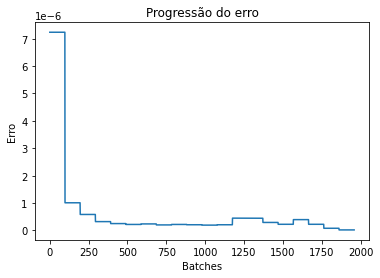

In [50]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [51]:
modelo.to_disk("modelo")

### Etapa 6: Testes com uma frase

In [52]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

### Texto positivo

In [53]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [54]:
previsao = modelo_carregado(texto_positivo)
previsao

  ficar feliz q recíproco emocaopositiva

In [55]:
previsao.cats

{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05}

In [58]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [59]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.023751061409711838, 'NEGATIVO': 0.9931586384773254}

### Texto negativo

In [60]:
base_teste['tweet_text'][4000]

'tô triste filmar mulan o mushu emocaonegativa'

In [61]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.00010711907816585153, 'NEGATIVO': 0.9999526739120483}

### Etapa 7: Avaliação de treinamento

### Avaliação na base de teste

In [62]:
previsoes = []
for texto in base_teste['tweet_text']:
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [63]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [64]:
respostas_reais = base_teste['sentiment'].values

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9978

In [67]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2494,    6],
       [   5, 2495]], dtype=int64)

<AxesSubplot:>

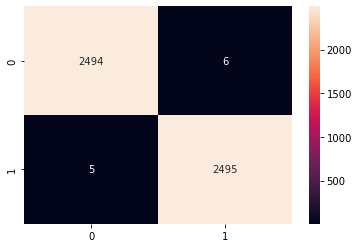

In [69]:
sns.heatmap(cm, annot=True, fmt="d")